# Table of contents

* [Preprocessing](#Preprocessing)
    + [Missing Value Handling](#Missing-Value-Handling)
    + [Outlier Handling](#Outlier-Handling)
    + [Remove duplicates](#Remove-duplicates)
    + [Delete Unnecessary Columns](#Delete-Unnecessary-Columns)
    
* [Analyze](#Analyze)
    + [자치구별 (학교에 다니는 학생수/ 총 학생수) 구하기](#1.자치구별-(학교에-다니는-학생수/-총-학생수)-구하기)
    + [자치구별 (학원에 다니는 학생수/ 총 학생수) 구하기](#1.자치구별-(학원에-다니는-학생수/-총-학생수)-구하기)
* [Visualize](#Visualize)
    + [자치구별 유치원 수](#1.자치구별-유치원-수)
    + [연도별 만3세 유아수 변화](#2.연도별-만3세-유아수-변화)
    + [연도별 만4세 유아수 변화](#3.연도별-만3세-유아수-변화)
    + [연도별 만5세 유아수 변화](#4.연도별-만3세-유아수-변화)
    + [유치원 교육열 시각화](#5.유치원-교육열-시각화)
    + [초등학교 교육열 시각화](#6.초등학교-교육열-시각화)
    + [중학교 교육열 시각화](#7.중학교-교육열-시각화)
    + [고등학교 교육열 시각화](#8.고등학교-교육열-시각화)
    + [학교에 다니는 유치원생 수와 총 유치원생 수와의 상관관계](#9.학교에-다니는-유치원생-수와-총-유치원생-수와의-상관관계)
    + [학교에 다니는 초등학생 수와 총 초등학생 수와의 상관관계](#10.학교에-다니는-초등학생-수와-총-초등학생-수와의-상관관계)
    + [학교에 다니는 중학생 수와 총 중학생 수와의 상관관계](#11.학교에-다니는-중학생-수와-총-중학생-수와의-상관관계)
    + [학교에 다니는 고등학생 수와 총 고등학생 수와의 상관관계](#12.학교에-다니는-고등학생-수와-총-고등학생-수와의-상관관계)
    + [학원에 다니는 학생 수와 총 학생 수와의 상관관계](#13.학원에-다니는-학생-수와-총-학생-수와의-상관관계)

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [76]:
#Main Data
kindergarten = pd.read_csv('./data/서울특별시 유치원 일반현황.csv')
pop_age = pd.read_csv('./data/서울시 주민등록연앙인구(연령별동별) 통계.csv')
st = pd.read_excel('./data/2021 서울시 학급당 학생수 통계.xlsx')

### Missing Value Handling

In [77]:
kd=kindergarten
kd.head()

,교육지원청명,유치원명,설립유형,설립일,개원일,주소,운영시간,만3세학급수,만4세학급수,만5세학급수,혼합학급수,특수학급수,만3세유아수,만4세유아수,만5세유아수,혼합유아수,특수유아수
0,남부교육지원청,서울정심초등학교병설유치원,공립(병설),20181116,20190314,서울특별시 금천구 독산로78다길 89,07시30분~19시30분,1.0,1.0,1.0,0,1.0,5.0,17.0,12.0,0,3.0
1,강동송파교육지원청,서울솔방울유치원,공립(단설),20210301,20210301,서울특별시 송파구 오금로24길 25,07시00분~19시00분,2.0,2.0,2.0,0,NaN,29.0,43.0,39.0,0,NaN
2,강동송파교육지원청,란키즈유치원,사립(사인),20170307,20170307,서울특별시 송파구 새말로8길 22-5,09시00분~19시00분,1.0,1.0,2.0,0,NaN,12.0,13.0,29.0,0,NaN
3,동부교육지원청,서울신현초등학교병설유치원,공립(병설),20201231,20210301,서울특별시 중랑구 봉화산로 188,07시30분~19시30분,1.0,1.0,1.0,0,1.0,16.0,11.0,14.0,0,4.0
4,서부교육지원청,다우림유치원,사립(사인),20170330,20170401,서울특별시 은평구 증산로21길 22,08시00분~20시00분,1.0,1.0,1.0,0,NaN,27.0,12.0,23.0,0,NaN


In [78]:
#결측치 제거
kd['만3세학급수']=kd['만3세학급수'].fillna(1)
kd['만4세학급수']=kd['만4세학급수'].fillna(1)
kd['만5세학급수']=kd['만5세학급수'].fillna(1)
kd['특수학급수']=kd['특수학급수'].fillna(1)
kd['만3세유아수']=kd['만3세유아수'].fillna(16)
kd['만4세유아수']=kd['만4세유아수'].fillna(22)
kd['만5세유아수']=kd['만5세유아수'].fillna(24)
kd['특수유아수']=kd['특수유아수'].fillna(4)

### Outlier Handling

In [79]:
#이상치 처리
kd['혼합학급수']=kd['혼합학급수'].clip(0,10)
kd['혼합유아수']=kd['혼합유아수'].clip(0, 44)

### Remove duplicates

In [80]:
kd.duplicated().sum()

0

### Delete Unnecessary Columns

In [81]:
#분석에 쓰이지 않는 열 삭제
del kd['유치원명']
del kd['설립유형']
del kd['운영시간']

### Analyze

In [82]:
#자치구만 따로 추출
kd['행정구역명']=kd['주소'].str.split(' ').str[1]

In [83]:
#설립일과 개원일 기준으로 정렬
kd=kd.sort_values(['설립일', '개원일'])

In [84]:
#정렬된 데이터 인덱스 재설정
xlist=[i for i in range(1,915)]
kd.index=xlist

### 자치구별 (학교에 다니는 학생수/ 총 학생수) 구하기

In [85]:
#자치구별로 그룹화
kd_sum=st.groupby('지역')['유치원'].sum()
elementary_sum=st.groupby('지역')['초등학교'].sum()
middle_sum=st.groupby('지역')['중학교'].sum()
high_sum=st.groupby('지역')['고등학교'].sum()

In [86]:
helloworld = pd.read_excel('./data/helloworld_data_set.xlsx',sheet_name=['학원교습소정보','주민등록연앙인구통계'])

In [87]:
academy_data, pop_data = helloworld.values()
locals().update(helloworld)
pop_data.head()

,자치구,동,구분,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
0,종로구,사직동,남자,4075,106,175,154,144,206,340,...,319,312,217,147,142,122,63,22,8,1
1,종로구,사직동,여자,4999,105,178,182,185,266,386,...,365,354,247,206,190,164,89,36,10,1
2,종로구,삼청동,남자,1170,15,31,51,52,77,85,...,100,97,78,66,47,29,17,7,2,1
3,종로구,삼청동,여자,1262,22,35,42,33,64,88,...,98,112,89,68,64,57,37,11,2,0
4,종로구,부암동,남자,4542,85,175,241,239,292,366,...,364,351,255,181,154,102,51,12,2,0


In [88]:
#자치구별 인구 합계
pop_sum = pop_data.groupby('자치구').sum()
pop_sum.head()

,계,0~4세,5~9세,10~14세,15~19세,20~24세,25~29세,30~34세,35~39세,40~44세,...,55~59세,60~64세,65~69세,70~74세,75~79세,80~84세,85~89세,90~94세,95~99세,100세 이상+
자치구,,,,,,,,,,,,,,,,,,,,,
강남구,412057,12971,20598,18247,21242,27917,29206,28030,29313,29903,...,30531,29488,25982,19782,13583,7900,3925,1656,419,62
강동구,368632,15524,17043,17556,19621,24699,24236,25583,25347,26617,...,25920,24064,23652,17414,12768,7306,3668,1491,314,56
강북구,269186,6148,8759,9167,11468,18531,19062,18428,17506,18159,...,20458,20269,18551,16102,13132,8266,3518,1110,249,27
강서구,401233,16534,14741,14068,16657,24847,27930,28929,28552,28924,...,30006,29823,27290,20837,15529,9902,5039,1951,433,50
관악구,382634,9200,11870,12481,15201,29566,27948,29111,29346,28229,...,27584,27667,24963,20686,15683,9482,3879,1281,262,41


In [89]:
#필요한 열만 추출
student = pop_sum.iloc[:,[1,2,3,4]] 
student

,0~4세,5~9세,10~14세,15~19세
자치구,,,,
강남구,12971,20598,18247,21242
강동구,15524,17043,17556,19621
강북구,6148,8759,9167,11468
강서구,16534,14741,14068,16657
관악구,9200,11870,12481,15201
광진구,7832,9162,9696,11558
구로구,12210,13422,13010,15040
금천구,5502,6582,6560,7682
노원구,12802,19067,19426,22182


In [90]:
#연령별 인구 
total_kd=student['0~4세']
total_elementary = student['5~9세']
total_middle=student['10~14세']
total_high=student['15~19세']
total_student=student['5~9세']+student['10~14세']+student['15~19세']

In [91]:
#교육열 구하기
유치원교육열=(kd_sum / total_kd) * 100
초등교육열 = (elementary_sum / total_elementary) * 100
중등교육열 = (middle_sum / total_middle) * 100
고등교육열 = (high_sum / total_high)* 100

In [92]:
#교육열 정렬 후 데이터 프레임 생성
유치원교육열=유치원교육열.sort_values(ascending=False)
초등교육열 = 초등교육열.sort_values(ascending = False)
중등교육열 = 중등교육열.sort_values(ascending = False)
고등교육열 = 고등교육열.sort_values(ascending = False)
data={'유치원교육열':유치원교육열,
    '초등교육열':초등교육열,
     '중등교육열':중등교육열,
     '고등교육열':고등교육열}
df=pd.DataFrame(data); df

,유치원교육열,초등교육열,중등교육열,고등교육열
지역,,,,
강남구,22.650528,125.395669,89.877788,82.892383
강동구,27.087091,129.625066,61.961722,54.538505
강북구,19.502277,107.455189,65.964874,45.674922
강서구,28.946413,168.889492,76.265283,84.913250
관악구,29.152174,114.153328,55.812836,58.186961
광진구,28.562308,149.989085,76.062294,63.202976
구로구,22.055692,128.818358,62.590315,59.973404
금천구,25.863322,122.303251,60.396341,50.520698
노원구,42.696454,129.501232,78.312571,86.268145


### 자치구별 (학원에 다니는 학생수/ 총 학생수) 구하기

In [93]:
academy_data.head()

,자치구,학원/교습소,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정명,정원합계,일시수용능력인원합계,인당수강료내용,기숙사학원여부,등록일자,휴원시작일자,휴원종료일자,개설일자,개설연도
0,동대문구,학원,도우리이용기술학원,동대문구 왕산로33길 32,/ 2층 (제기동),직업기술,산업응용기술,이·미용,40,20,알수없음,N,1967-02-09,0,0,1967-02-09,1967
1,동대문구,학원,국제전자과학학원,동대문구 고산자로36길 3,/ 3층 일부 (제기동/ 경동시장),직업기술,산업기반기술,전자,30,91,알수없음,N,1968-02-10,0,0,1968-02-10,1968
2,동대문구,학원,조이앤플레이음악학원,동대문구 이문로 38,/ 3층 301호 (휘경동/ 민족통일빌딩),예능(대),예능(중),음악,98,45,알수없음,N,1972-06-30,0,0,1972-06-30,1972
3,동대문구,학원,한독자동차정비학원,동대문구 왕산로 31,/ 2층/3층 (신설동),직업기술,산업기반기술,자동차,210,177,알수없음,N,1972-05-01,0,0,1972-05-01,1972
4,중랑구,학원,예맥보습학원,중랑구 동일로151길 30,2층3층 (묵동),입시.검정 및 보습,보통교과,보습,18,152,알수없음,알수없음,1988-11-02,0,0,1988-11-02,1988


In [94]:
academy_sum=academy_data.groupby('자치구')['정원합계'].sum()
year_sum=academy_data.groupby(['자치구','개설연도'])[['정원합계']].sum()
year_sum

정원합계
자치구 개설연도      
강남구 1967    40
    1970   242
    1975   140
    1979   163
    1980     0
...        ...
중랑구 2018  6040
    2019  2744
    2020  4037
    2021  6055
    2022   375

[994 rows x 1 columns]

In [95]:
사교육열=(academy_sum/total_student)*100

### Visualize

### 자치구별 유치원 수

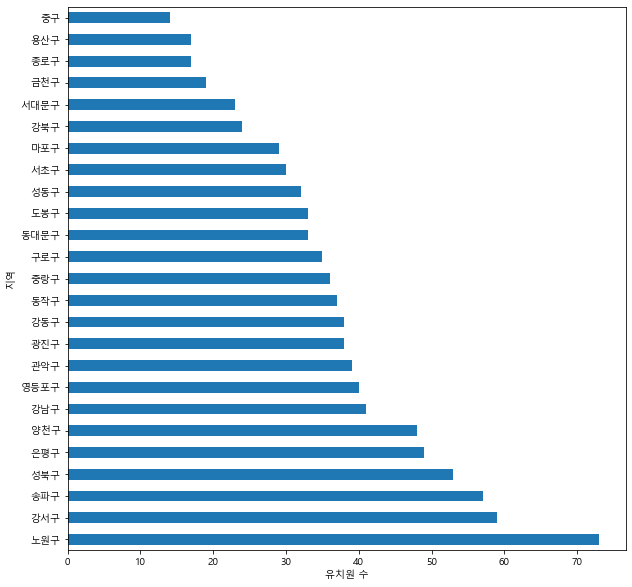

In [96]:
plt.figure(figsize=(10,10))
kd['행정구역명'].value_counts().plot(kind='barh')
plt.xlabel('유치원 수')
plt.ylabel('지역')
plt.show()

### 연도별 만3세 유아수 변화

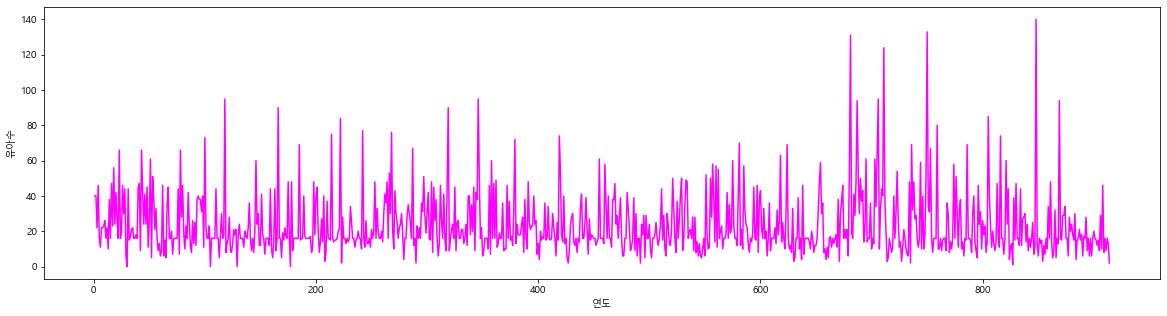

In [97]:
plt.figure(figsize=(20,5))
plt.plot(kd['만3세유아수'],color='magenta')
plt.xlabel('연도')
plt.ylabel('유아수')
plt.show()

### 연도별 만4세 유아수 변화

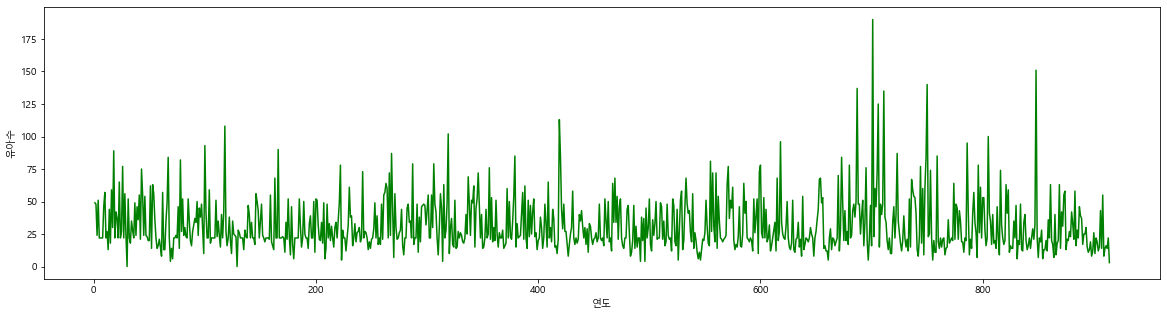

In [98]:
plt.figure(figsize=(20,5))
plt.plot(kd['만4세유아수'],color='green')
plt.xlabel('연도')
plt.ylabel('유아수')
plt.show()

### 연도별 만5세 유아수 변화

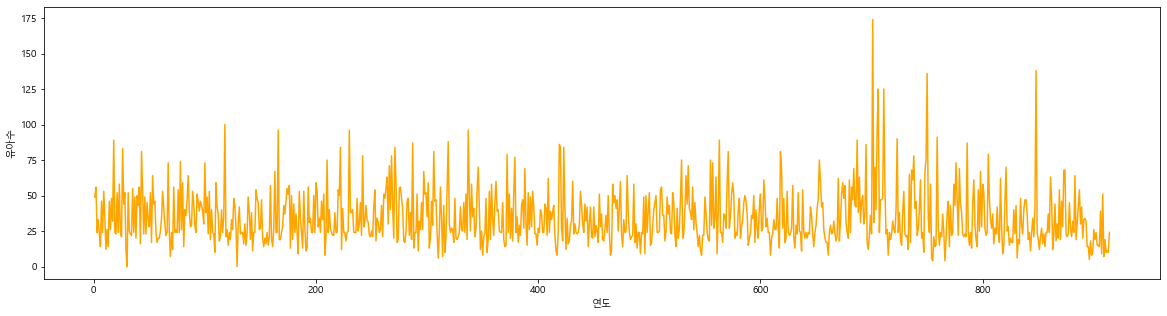

In [99]:
plt.figure(figsize=(20,5))
plt.plot(kd['만5세유아수'],color='orange')
plt.xlabel('연도')
plt.ylabel('유아수')
plt.show()

### 유치원 교육열 시각화

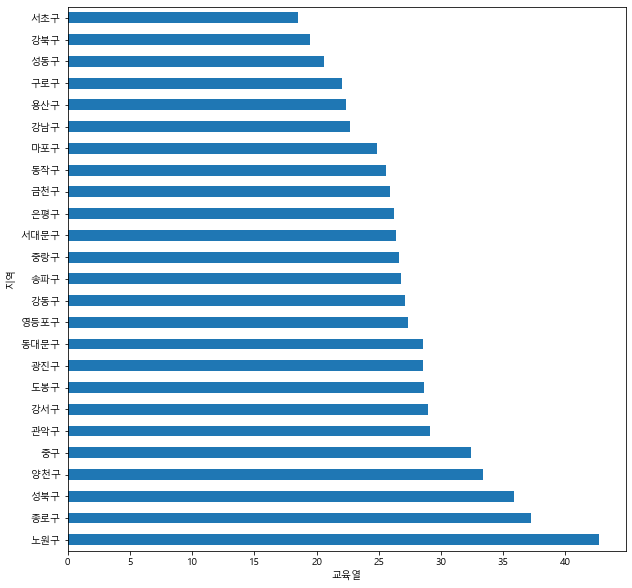

In [100]:
plt.figure(figsize=(10,10))
유치원교육열.plot(kind='barh')
plt.xlabel('교육열')
plt.show()

### 초등학교 교육열 시각화

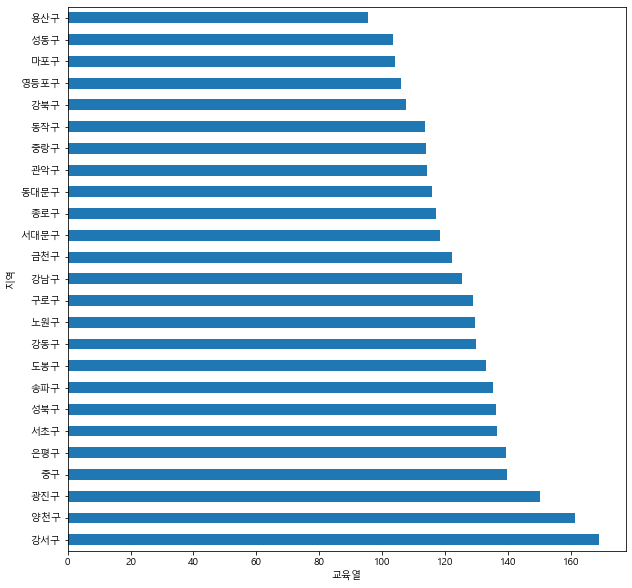

In [101]:
plt.figure(figsize=(10,10))
초등교육열.plot(kind='barh')
plt.xlabel('교육열')
plt.show()

### 중학교 교육열 시각화

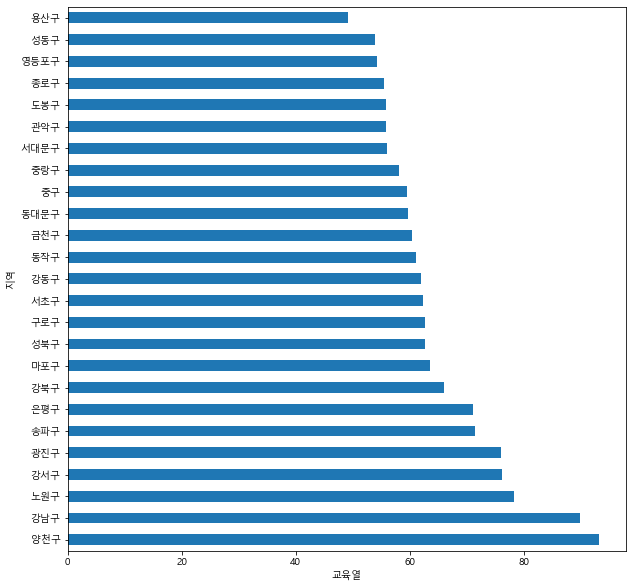

In [102]:
plt.figure(figsize=(10,10))
중등교육열.plot(kind='barh')
plt.xlabel('교육열')
plt.show()

### 고등학교 교육열 시각화

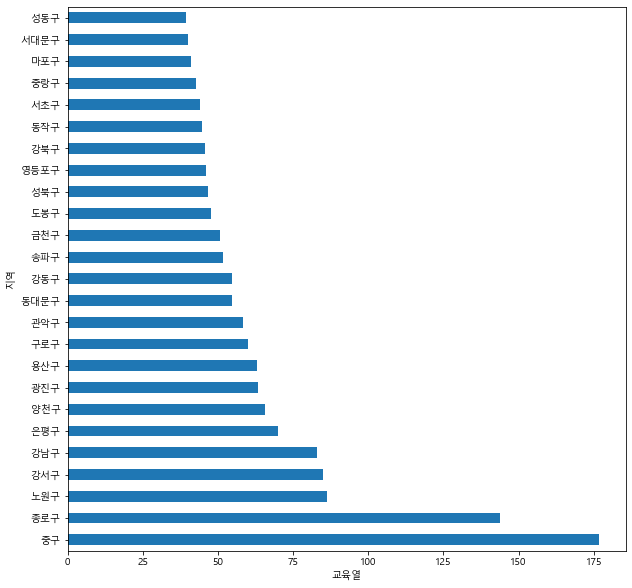

In [103]:
plt.figure(figsize=(10,10))
고등교육열.plot(kind='barh')
plt.xlabel('교육열')
plt.show()

### 학교에 다니는 유치원생 수와 총 유치원생 수와의 상관관계

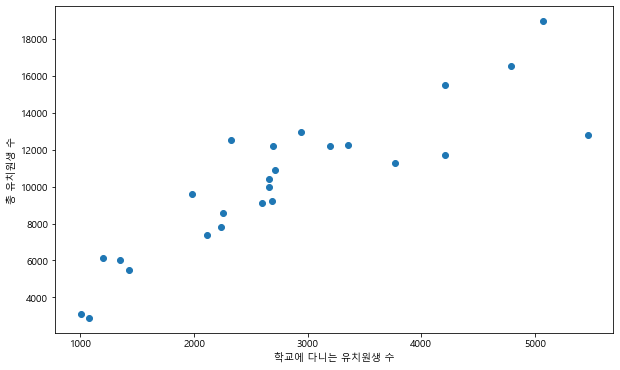

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(x=kd_sum,y=total_kd)
plt.xlabel('학교에 다니는 유치원생 수')
plt.ylabel('총 유치원생 수')
plt.show()

### 학교에 다니는 초등학생 수와 총 초등학생 수와의 상관관계

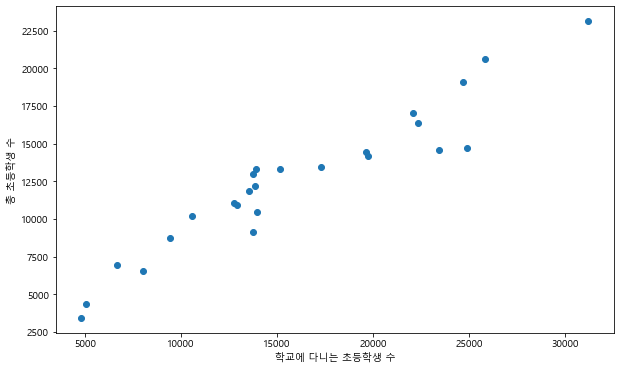

In [105]:
plt.figure(figsize=(10,6))
plt.scatter(x=elementary_sum,y=total_elementary)
plt.xlabel('학교에 다니는 초등학생 수')
plt.ylabel('총 초등학생 수')
plt.show()

### 학교에 다니는 중학생 수와 총 중학생 수와의 상관관계

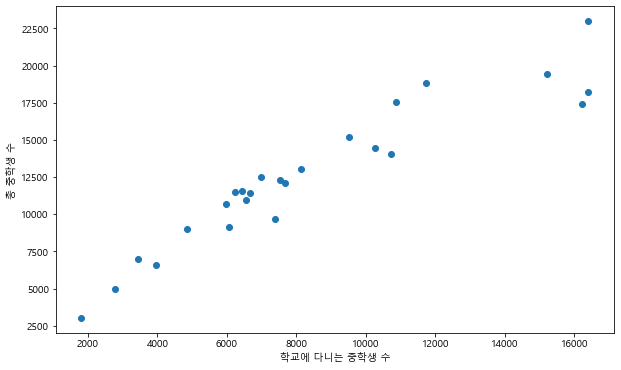

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(x=middle_sum,y=total_middle)
plt.xlabel('학교에 다니는 중학생 수')
plt.ylabel('총 중학생 수')
plt.show()

### 학교에 다니는 고등학생 수와 총 고등학생 수와의 상관관계

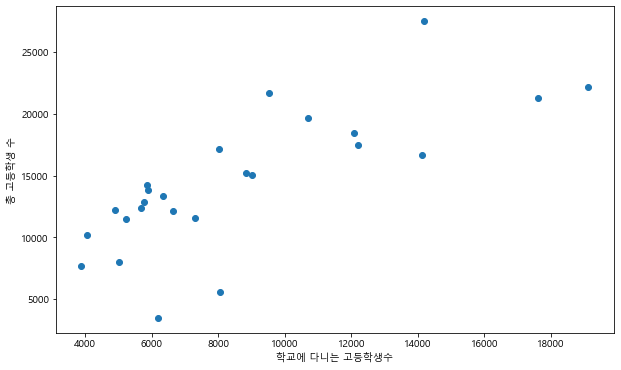

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(x=high_sum,y=total_high)
plt.xlabel('학교에 다니는 고등학생수')
plt.ylabel('총 고등학생 수')
plt.show()

### 학원에 다니는 학생 수와 총 학생 수와의 상관관계

In [108]:
academy_sum = pd.DataFrame(academy_sum)
academy_sum.rename(columns={'정원합계':'학원/교습소 학생 수'}, inplace=True)

In [109]:
total_student = pd.DataFrame(total_student)
total_student.rename(columns={0:'학교 학생 수'}, inplace=True)

In [112]:
student_df = pd.concat([academy_sum, total_student], axis=1)
student_df

,학원/교습소 학생 수,학교 학생 수
자치구,,
강남구,1341391,60087
강동구,118388,54220
강북구,60703,29394
강서구,162616,45466
관악구,462239,39552
광진구,140999,30416
구로구,76468,41472
금천구,37284,20824
노원구,233119,60675


In [113]:
fig=px.scatter(student_df, x='학원/교습소 학생 수', y='학교 학생 수', size=사교육열, title='학원/교습소에 다니는 학생 수와 학교 학생 수와의 상관관계')
fig.show()